In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Read the college.csv file into a DataFrame
college = pd.read_csv('college.csv')

In [39]:
# Changing the first column's name
college = college.rename(columns={'Unnamed: 0': 'College'})

college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [40]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


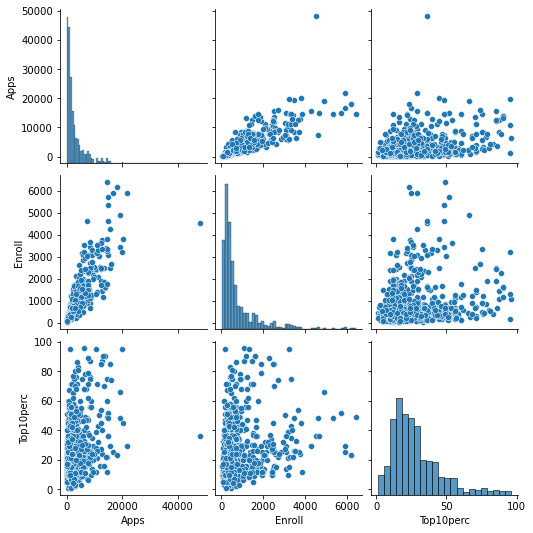

In [41]:
import seaborn as sns 
scatter_matrix = sns.pairplot(college[['Apps', 'Enroll', 'Top10perc']])

#pd.plotting.scatter_matrix(college[['Apps', 'Enroll', 'Top10perc']], figsize=(10,10))

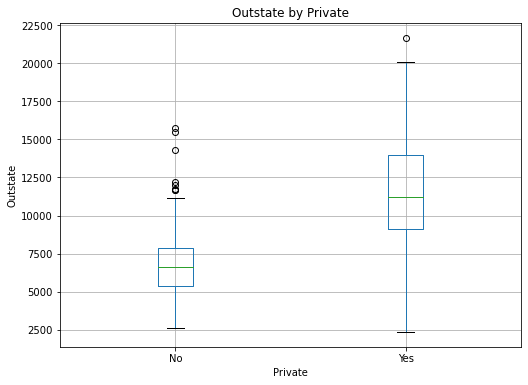

In [42]:
# Creating side-by-side boxplots
college.boxplot(column='Outstate', by='Private', figsize=(8, 6))

# Adding labels and title
plt.title('Outstate by Private')
plt.ylabel('Outstate')
plt.xlabel('Private')
plt.suptitle('')  # Removing the automatically generated title

plt.show()

Elite
Not Elite    699
Elite         78
Name: count, dtype: int64


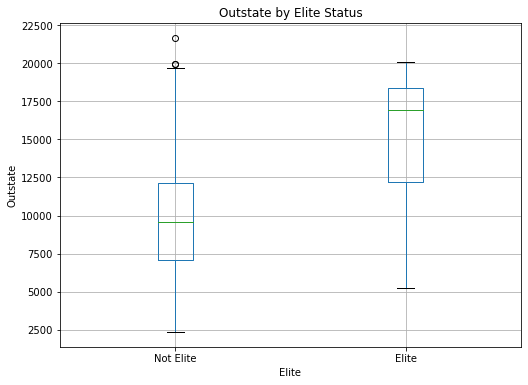

In [43]:
# Creating the new variable 'Elite'
college['Elite'] = pd.cut(college['Top10perc'], bins=[0, 50, 100], labels=['Not Elite', 'Elite'])

# Checking the counts of 'Elite' universities
elite_counts = college['Elite'].value_counts()
print(elite_counts)

# Creating side-by-side boxplots of 'Outstate' versus 'Elite'
college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))

# Adding labels and title
plt.title('Outstate by Elite Status')
plt.ylabel('Outstate')
plt.xlabel('Elite')
plt.suptitle('')  # Removing the automatically generated title

plt.show()

AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

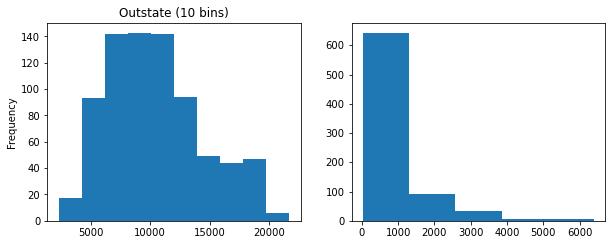

In [44]:
# Creating histograms with differing numbers of bins
plt.figure(figsize=(10, 8))

# Histogram for 'Outstate' with 10 bins
plt.subplot(2, 2, 1)
college['Outstate'].plot.hist(bins=10)
plt.title('Outstate (10 bins)')

# Histogram for 'Enroll' with 5 bins
plt.subplot(2, 2, 2)
college['Enroll'].plot.hist(bins=5)
plt.title('Enroll (5 bins)')

# Histogram for 'Apps' with 15 bins
plt.subplot(2, 2, 3)
college['Apps'].plot.hist(bins=15)
plt.title('Apps (15 bins)')

# Hide the empty subplot
plt.subplot(2, 2, 4).axis('off')

# Adjust layout
plt.tight_layout()

plt.show()

In [47]:
auto = pd.read_csv("auto.csv")

In [53]:
# Deleting rows that include '?' in the 'horsepower' column
for index, row in auto.iterrows():
    if row['horsepower'] == '?':
        print(index)

auto = auto.drop(auto.index[[32, 126, 330, 336, 354]])
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Quantitative Predictors:
mpg (miles per gallon)
cylinders
displacement
horsepower
weight
acceleration

Qualitative Predictor:
model year
origin

The 'car name' column can also be considered qualitative as it contains the names of the cars, 
but it's not a predictor variable since it uniquely identifies each car and doesn't provide predictive information. 
Therefore, it's typically excluded from analysis.

So, in summary:
Quantitative predictors: mpg, cylinders, displacement, horsepower, weight, acceleration
Qualitative predictors: model year, origin

In [58]:
# Defining the list of quantitative predictors
quantitative_predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Finding the range, mean, and standard deviation for each quantitative predictor
statistics = {}
for predictor in quantitative_predictors:
    min_value = np.min(auto[predictor])
    max_value = np.max(auto[predictor])
    mean_value = auto[predictor].mean()
    std_value = auto[predictor].std()
    statistics[predictor] = {'range': (min_value, max_value), 'mean': mean_value, 'std': std_value}

# Printing the range, mean, and standard deviation for each quantitative predictor
for predictor, values in statistics.items():
    print(f"Predictor: {predictor}")
    print(f"Range: {values['range'][0]} to {values['range'][1]}")
    print(f"Mean: {values['mean']:.2f}")
    print(f"Standard Deviation: {values['std']:.2f}\n")


Predictor: mpg
Range: 9.0 to 46.6
Mean: 23.38
Standard Deviation: 7.81

Predictor: cylinders
Range: 3 to 8
Mean: 5.48
Standard Deviation: 1.71

Predictor: displacement
Range: 68.0 to 455.0
Mean: 194.69
Standard Deviation: 105.27

Predictor: horsepower
Range: 46 to 230
Mean: 104.77
Standard Deviation: 38.83

Predictor: weight
Range: 1613 to 5140
Mean: 2980.90
Standard Deviation: 855.61

Predictor: acceleration
Range: 8.0 to 24.8
Mean: 15.53
Standard Deviation: 2.76



In [57]:
# Removing the 10th through 85th observations
auto_subset = auto.drop(auto.index[9:84])

# Selecting quantitative predictors
quantitative_predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Calculating range, mean, and standard deviation for each predictor in the subset
subset_statistics = {}
for predictor in quantitative_predictors:
    min_value = auto_subset[predictor].min()
    max_value = auto_subset[predictor].max()
    mean_value = auto_subset[predictor].mean()
    std_value = auto_subset[predictor].std()
    subset_statistics[predictor] = {'range': (min_value, max_value), 'mean': mean_value, 'std': std_value}

# Printing the range, mean, and standard deviation for each predictor in the subset
for predictor, values in subset_statistics.items():
    print(f"Predictor: {predictor}")
    print(f"Range: {values['range'][0]} to {values['range'][1]}")
    print(f"Mean: {values['mean']:.2f}")
    print(f"Standard Deviation: {values['std']:.2f}\n")


Predictor: mpg
Range: 11.0 to 46.6
Mean: 24.34
Standard Deviation: 7.87

Predictor: cylinders
Range: 3 to 8
Mean: 5.37
Standard Deviation: 1.65

Predictor: displacement
Range: 68.0 to 455.0
Mean: 187.24
Standard Deviation: 100.02

Predictor: horsepower
Range: 46 to 230
Mean: 100.82
Standard Deviation: 35.93

Predictor: weight
Range: 1649 to 4997
Mean: 2937.00
Standard Deviation: 816.59

Predictor: acceleration
Range: 8.5 to 24.8
Mean: 15.72
Standard Deviation: 2.69



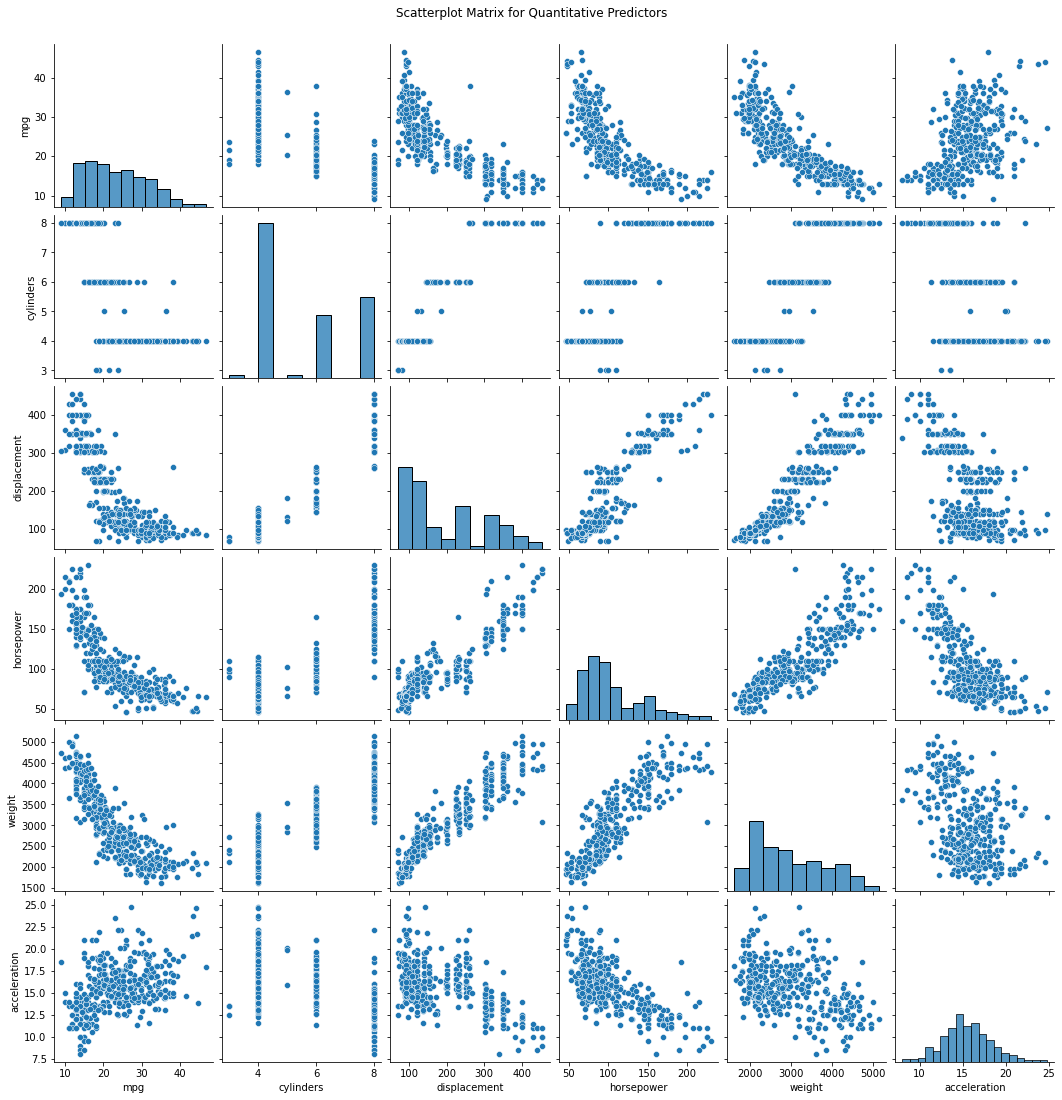

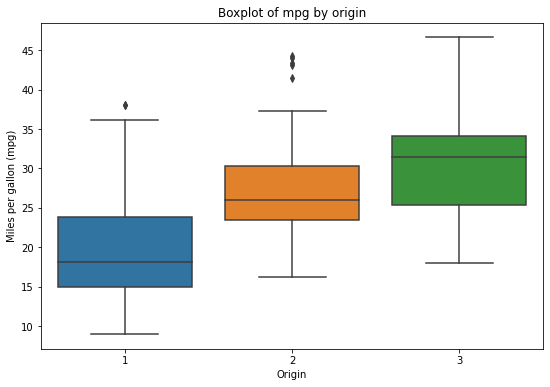

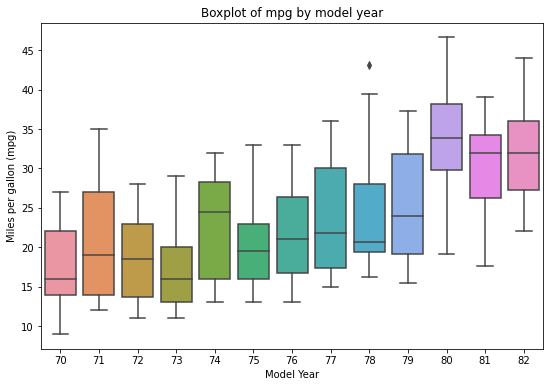

In [63]:
# Scatterplot matrix for quantitative predictors
sns.pairplot(auto[quantitative_predictors])
plt.suptitle('Scatterplot Matrix for Quantitative Predictors', y=1.02)
plt.show()

# Boxplot for qualitative predictor 'origin' vs. quantitative predictor 'mpg'
plt.figure(figsize=(12*0.75, 8*0.75))
sns.boxplot(x='origin', y='mpg', data=auto)
plt.title('Boxplot of mpg by origin')
plt.xlabel('Origin')
plt.ylabel('Miles per gallon (mpg)')
plt.show()

# Boxplot for qualitative predictor 'model year' vs. quantitative predictor 'mpg'
plt.figure(figsize=(12*0.75, 8*0.75))
sns.boxplot(x='year', y='mpg', data=auto)
plt.title('Boxplot of mpg by model year')
plt.xlabel('Model Year')
plt.ylabel('Miles per gallon (mpg)')
plt.show()

To predict gas mileage (mpg) based on the other variables in the Auto dataset, we can analyze the scatterplot matrix and boxplots to identify potential relationships between mpg and other predictors.

Scatterplot Matrix Analysis:
In the scatterplot matrix, we can look for patterns or trends between mpg and other quantitative predictors.
If we observe clear linear relationships or patterns between mpg and other variables, it suggests that those variables might be useful in predicting mpg.

For example, if there's a strong negative correlation between mpg and variables like cylinders, displacement, horsepower, weight, or acceleration, it indicates that higher values of these predictors are associated with lower mpg, and vice versa. These predictors could potentially be useful in predicting mpg.

Boxplot Analysis:
In the boxplots, we can observe the distribution of mpg across different categories of qualitative predictors (e.g., origin, model year).
If there are significant differences in the distribution of mpg across categories of a qualitative predictor, it suggests that the predictor may have an influence on mpg.

For example, if we observe notable differences in the median or spread of mpg across different origins or model years, it suggests that these predictors might be useful in predicting mpg.
Based on the plots, if we observe clear patterns or significant differences in the relationship between mpg and other predictors, it suggests that those predictors might be useful in predicting mpg. Conversely, if there are no discernible patterns or relationships, those predictors may not be as useful in predicting mpg.

It's important to conduct further statistical analysis, such as correlation analysis or regression modeling, to quantify the relationships and determine the predictive power of each variable in predicting mpg accurately.